In [154]:
import pandas as pd
import geopandas as gp
import matplotlib as pl
from sklearn.cluster import KMeans
from shapely.geometry import Point
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [155]:
#CitiBike Stations
stations = pd.read_csv('../data/external/citibike_data/citi_bike_station_info.csv')
geometry = gp.GeoSeries([Point(xy) for xy in zip(stations.Longitude, stations.Latitude)])
geo_stations = gp.GeoDataFrame(stations, geometry=geometry)
geo_stations.crs = {'init' :'epsg:4326'}
geo_stations.drop(['Location', 'Latitude', 'Longitude'], axis = 1, inplace = True)
geo_stations.rename(columns={'Station_id' : 'station_id'}, inplace=True)
geo_stations.head()

,station_id,Station_Name,geometry
0,72,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [203]:
#Master file with ridership and metrics
master = pd.read_csv('../data/processed/master.csv')
master.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,...,ridership_1215,avg_ridership_2015,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,...,1648.0,2131.615385,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,...,1579.0,1760.538462,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,...,713.0,766.538462,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,...,717.0,863.307692,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,...,3686.0,3576.692308,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [157]:
#Dataframe with only ridership data
ridership = master.copy()
ridership.drop([u'bike_lane_score', u'park',
       u'street_quality_score', u'subway_entrance', u'tree_score',
       u'traffic_volume', u'median_hh_income', u'pop_density'], axis = 1, inplace = True)
ridership.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,ridership_1115,ridership_1215,avg_ridership_2015
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,3546.0,2323.0,1648.0,2131.615385
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,2646.0,2074.0,1579.0,1760.538462
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,1053.0,819.0,713.0,766.538462
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,1104.0,886.0,717.0,863.307692
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,5825.0,4455.0,3686.0,3576.692308


In [158]:
#Merging ridership with citibike station file
ridership = pd.merge(ridership, geo_stations, on = 'station_id', how = 'inner')
ridership.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,ridership_1015,ridership_1115,ridership_1215,avg_ridership_2015,Station_Name,geometry
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,3546.0,2323.0,1648.0,2131.615385,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,2646.0,2074.0,1579.0,1760.538462,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,1053.0,819.0,713.0,766.538462,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,1104.0,886.0,717.0,863.307692,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,5825.0,4455.0,3686.0,3576.692308,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [159]:
#Saving shapefile
ridership = gp.GeoDataFrame(ridership)
ridership.to_file('../data/processed/ridership')

In [160]:
#Dataframe with only regressor data
regressors = master.copy()
regressors.drop([u'ridership_0115', u'ridership_0215', u'ridership_0315',
       u'ridership_0415', u'ridership_0515', u'ridership_0615',
       u'ridership_0715', u'ridership_0815', u'ridership_0915',
       u'ridership_1015', u'ridership_1115', u'ridership_1215',
       u'avg_ridership_2015'], axis = 1, inplace = True)
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [161]:
#Merging regressors with citibike station file
regressors = pd.merge(regressors, geo_stations, on = 'station_id', how = 'inner')
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [162]:
#Creating regressors shape file
regressors = gp.GeoDataFrame(regressors)
regressors.to_file('../data/processed/regressors')

In [163]:
#Creating Master file woith station data
master_shape = pd.merge(master, geo_stations, on = 'station_id', how = 'inner')
master_shape = gp.GeoDataFrame(master_shape)
master_shape.head()

,station_id,ridership_0115,ridership_0215,ridership_0315,ridership_0415,ridership_0515,ridership_0615,ridership_0715,ridership_0815,ridership_0915,...,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,...,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216)
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,...,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552)
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,...,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416)
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,...,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604)
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,...,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603)


In [164]:
#Creating master shapefile
master_shape.to_file('../data/processed/master_shape')

In [166]:
#Dissolving a zip-code file by borough
nyc = gp.read_file('../data/external/nyc-zip-code-tabulation-areas-polygons.geojson')
nyc = nyc.dissolve(by = 'borough')
nyc.head()

,geometry,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,postalCode
borough,,,,,,,,,,,
Bronx,(POLYGON ((-73.89262280059243 40.7924566404958...,http://nyc.pediacities.com/Resource/PostalCode...,0,005,39,Bronx,NY,36,8.965141e+07,53208.969025,10471
Brooklyn,(POLYGON ((-73.84075859919754 40.6253640147008...,http://nyc.pediacities.com/Resource/PostalCode...,0,047,22,Brooklyn,NY,36,3.858048e+07,30947.536928,11221
Manhattan,"(POLYGON ((-74.0241846235316 40.6839187687422,...",http://nyc.pediacities.com/Resource/PostalCode...,0,061,48,Bronx,NY,36,3.119702e+06,7791.517127,10463
Queens,(POLYGON ((-73.83262845663923 40.6084098174018...,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,11372
Staten Island,POLYGON ((-74.24966624246994 40.51555479573201...,http://nyc.pediacities.com/Resource/PostalCode...,0,085,164,Staten Island,NY,36,1.051827e+08,79638.650353,10301


In [167]:
#Dropping extraneous data
nyc.drop([ u'@id', u'BLDGpostalCode',
             u'CTY_FIPS',       u'OBJECTID',        u'PO_NAME',
                u'STATE',        u'ST_FIPS',     u'Shape_Area',
           u'Shape_Leng',     u'postalCode'], axis = 1, inplace = True)
nyc.reset_index(inplace=True)
nyc.head()

,borough,geometry
0,Bronx,(POLYGON ((-73.89262280059243 40.7924566404958...
1,Brooklyn,(POLYGON ((-73.84075859919754 40.6253640147008...
2,Manhattan,"(POLYGON ((-74.0241846235316 40.6839187687422,..."
3,Queens,(POLYGON ((-73.83262845663923 40.6084098174018...
4,Staten Island,POLYGON ((-74.24966624246994 40.51555479573201...


In [168]:
#Creating dataframe X for KMeans clustering
X = pd.DataFrame(regressors.iloc[:, range(1,9)])
X.head()

,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density
0,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807
1,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631
2,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511
3,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231
4,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742


In [169]:
#KMeans for all metrics
kmeans = KMeans(6).fit(X)
regressors['kmeans_label'] = kmeans.labels_

(-74.05, -73.9)

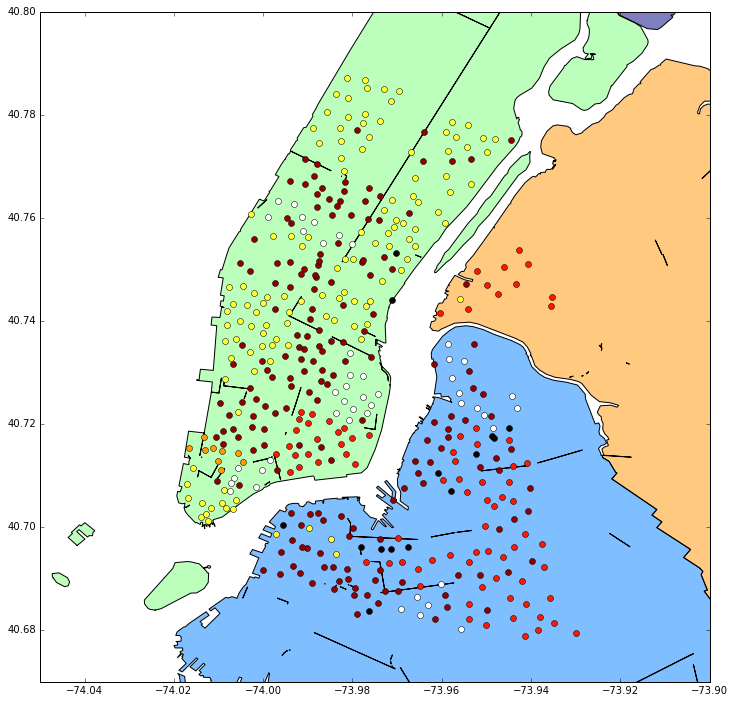

In [170]:
#Plot for KMeans for all metrics
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors.plot(column = 'kmeans_label', ax = ax, marker='o', cmap='hot_r' \
                                                     , markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)

In [171]:
#Kmeans for significant regressors
kmeans = KMeans(6).fit(X[[u'bike_lane_score' , u'subway_entrance', u'median_hh_income', u'pop_density']])
regressors['kmeans_significant'] = kmeans.labels_

(-74.05, -73.9)

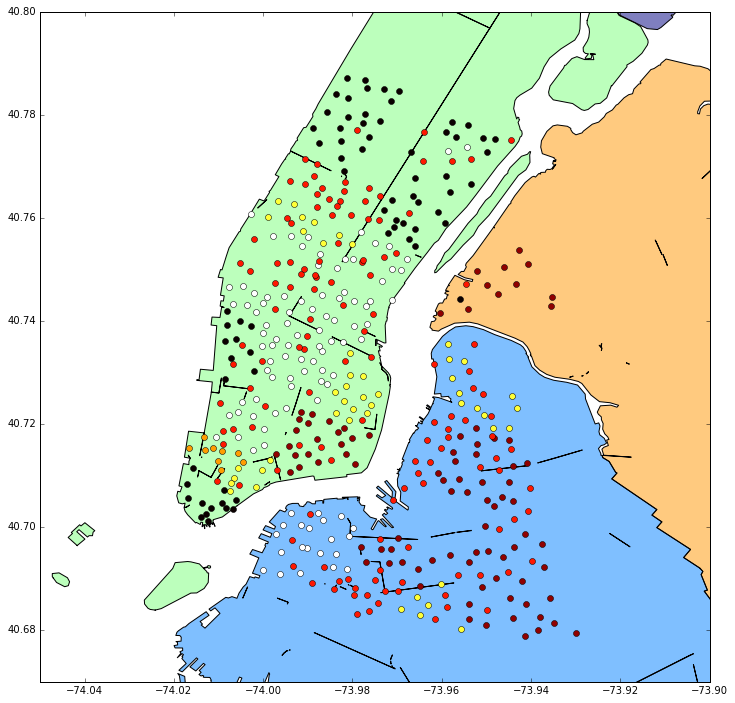

In [172]:
#Plot for KMeans for significant regressors
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors.plot(column = 'kmeans_significant', ax = ax, marker='o', cmap='hot_r' \
                                                     , markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)

In [173]:
#Creating regressors shapefile
regressors.to_file('../data/processed/significant_regressors')
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry,kmeans_label,kmeans_significant
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216),4,3
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552),4,3
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416),0,1
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604),5,3
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603),1,0


In [186]:
#Creating dataframe for clusters
median_income = []
bike_lane_score = []
subway_entrance = []
pop_density = []
for i in range(6):
    median_income.append((regressors[regressors.kmeans_significant == i]).median_hh_income.mean())
    bike_lane_score.append((regressors[regressors.kmeans_significant == i]).bike_lane_score.mean())
    subway_entrance.append((regressors[regressors.kmeans_significant == i]).subway_entrance.mean())
    pop_density.append((regressors[regressors.kmeans_significant == i]).pop_density.mean()*1000)

clusters = pd.DataFrame()

for i in range(0,6):
    clusters.loc[i ,'median_income'] = median_income[i]
    clusters.loc[i ,'bike_lane_score'] = bike_lane_score[i]
    clusters.loc[i ,'subway_entrance'] = subway_entrance[i]
    clusters.loc[i ,'pop_density'] = pop_density[i]
clusters

,median_income,bike_lane_score,subway_entrance,pop_density
0,100423.184466,2.227994,0.077670,0.580819
1,67336.361702,1.193769,0.106383,0.561874
2,248518.666667,1.630303,0.333333,0.738939
3,86431.504220,1.800617,0.170370,0.501608
4,41209.659091,1.449577,0.102273,0.515449
5,115267.014286,1.838492,0.142857,0.696199


In [187]:
regressors['avg_ridership'] = ridership['avg_ridership_2015']
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry,kmeans_label,kmeans_significant,avg_ridership,kmeans_clusters_with_ridership
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216),4,3,2131.615385,5
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552),4,3,1760.538462,5
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416),0,1,766.538462,3
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604),5,3,863.307692,5
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603),1,0,3576.692308,1


In [181]:
#Creating dataframe with metrics and average ridership
X = regressors[['bike_lane_score', 'subway_entrance', 'median_hh_income', 'pop_density', 'avg_ridership']]
kmeans = KMeans(6).fit(X)
regressors['kmeans_clusters_with_ridership'] = kmeans.labels_
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry,kmeans_label,kmeans_significant,avg_ridership,kmeans_clusters_with_ridership
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216),4,3,2131.615385,5
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552),4,3,1760.538462,5
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416),0,1,766.538462,3
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604),5,3,863.307692,5
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603),1,0,3576.692308,1


In [188]:
Y = regressors[['bike_lane_score', 'subway_entrance', 'median_hh_income', 'pop_density', 'avg_ridership', 'kmeans_clusters_with_ridership' ]]
Y.head()

,bike_lane_score,subway_entrance,median_hh_income,pop_density,avg_ridership,kmeans_clusters_with_ridership
0,0.0,0.0,90174.000000,0.000807,2131.615385,5
1,3.0,1.0,86523.139535,0.000631,1760.538462,5
2,0.0,0.0,73988.000000,0.000511,766.538462,3
3,0.0,0.0,85199.000000,0.000231,863.307692,5
4,4.0,0.0,104974.000000,0.000742,3576.692308,1


(-74.05, -73.9)

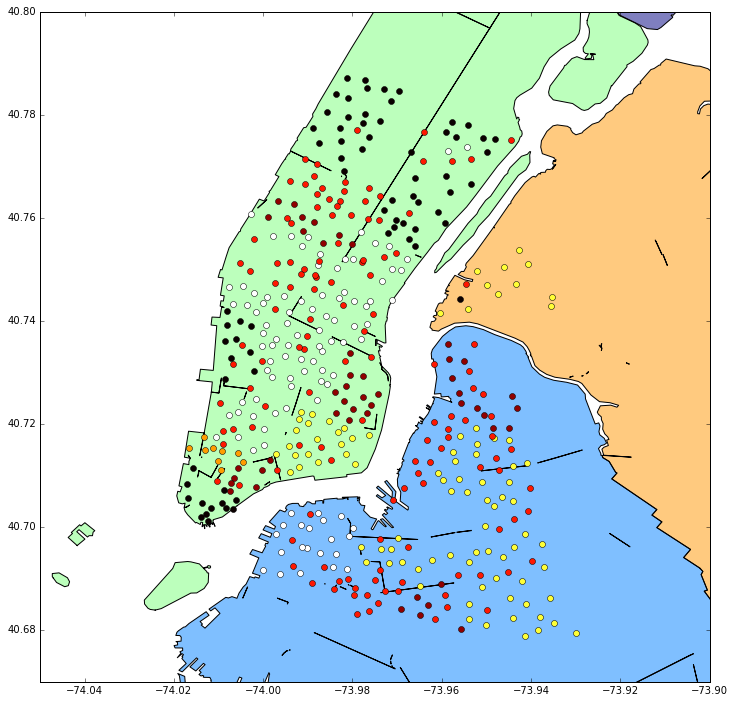

In [177]:
#Plot for KMeans
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors.plot(column = 'kmeans_clusters_with_ridership'\
                            , ax = ax, marker='o', cmap='hot_r', markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)

In [189]:
#Creating a dataframe with cluster data
median_income_ridership = []
bike_lane_score_ridership = []
subway_entrance_ridership = []
pop_density_ridership = []
avg_ridership = []
for i in range(6):
    median_income_ridership.append((regressors[regressors.kmeans_clusters_with_ridership == i]).median_hh_income.mean())
    bike_lane_score_ridership.append((regressors[regressors.kmeans_clusters_with_ridership == i]).bike_lane_score.mean())
    subway_entrance_ridership.append((regressors[regressors.kmeans_clusters_with_ridership == i]).subway_entrance.mean())
    pop_density_ridership.append((regressors[regressors.kmeans_clusters_with_ridership == i]).pop_density.mean()*1000)
    avg_ridership.append((regressors[regressors.kmeans_clusters_with_ridership == i]).avg_ridership.mean())

clusters_ridership = pd.DataFrame()
for i in range(0,6):
    clusters_ridership.loc[i ,'median_income'] = median_income[i]
    clusters_ridership.loc[i ,'bike_lane_score'] = bike_lane_score[i]
    clusters_ridership.loc[i ,'subway_entrance'] = subway_entrance[i]
    clusters_ridership.loc[i ,'pop_density'] = pop_density[i]
    clusters_ridership.loc[i ,'avg_ridership'] = avg_ridership[i]

clusters_ridership

,median_income,bike_lane_score,subway_entrance,pop_density,avg_ridership
0,100423.184466,2.227994,0.077670,0.580819,1021.531760
1,67336.361702,1.193769,0.106383,0.561874,2529.128467
2,248518.666667,1.630303,0.333333,0.738939,3260.326211
3,86431.504220,1.800617,0.170370,0.501608,1722.322600
4,41209.659091,1.449577,0.102273,0.515449,2248.430480
5,115267.014286,1.838492,0.142857,0.696199,1976.803019


In [190]:
regressors.head()

,station_id,bike_lane_score,park,street_quality_score,subway_entrance,tree_score,traffic_volume,median_hh_income,pop_density,Station_Name,geometry,kmeans_label,kmeans_significant,avg_ridership,kmeans_clusters_with_ridership
0,72,0.0,1.0,8.000000,0.0,17.364799,14870.500000,90174.000000,0.000807,W 52 St & 11 Ave,POINT (-73.99392888 40.76727216),4,3,2131.615385,5
1,79,3.0,0.0,8.571429,1.0,9.573955,9484.666667,86523.139535,0.000631,Franklin St & W Broadway,POINT (-74.00666661 40.71911552),4,3,1760.538462,5
2,82,0.0,1.0,7.333333,0.0,35.070325,16812.500000,73988.000000,0.000511,St James Pl & Pearl St,POINT (-74.00016545 40.71117416),0,1,766.538462,3
3,83,0.0,0.0,7.500000,0.0,0.000000,41976.000000,85199.000000,0.000231,Atlantic Ave & Fort Greene Pl,POINT (-73.97632328 40.68382604),5,3,863.307692,5
4,116,4.0,1.0,8.500000,0.0,47.824344,15948.000000,104974.000000,0.000742,W 17 St & 8 Ave,POINT (-74.00149746 40.74177603),1,0,3576.692308,1


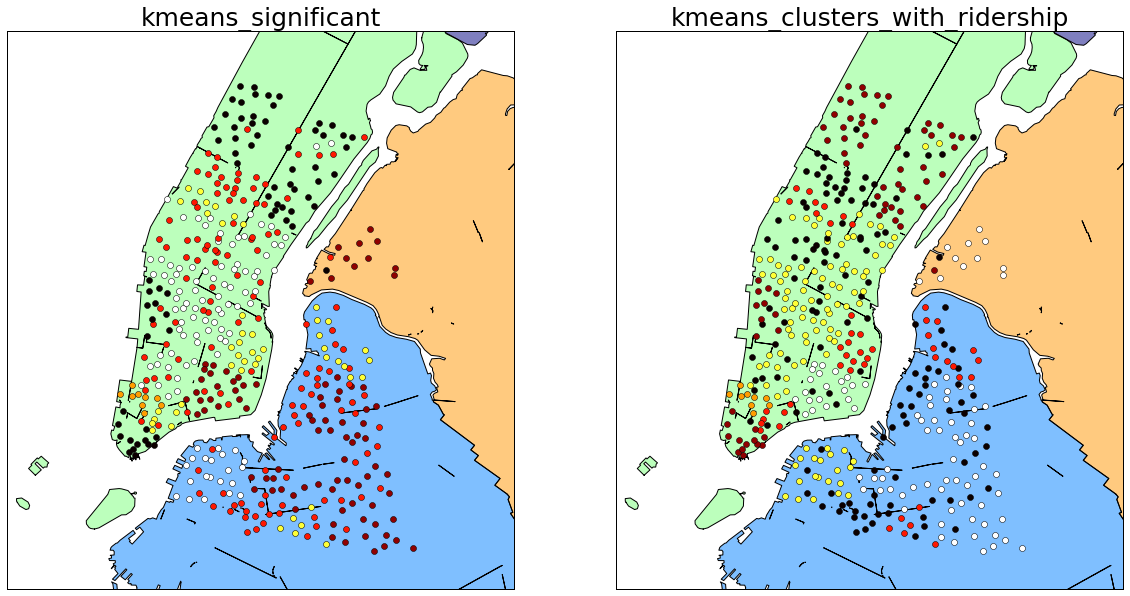

In [191]:
fig = plt.figure(figsize=(20,10))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
nyc.plot(ax = ax1)
regressors.plot(column = 'kmeans_significant', ax = ax1, marker='o', cmap='hot_r' \
                                                     , markersize=6)
ax1.set_ylim(40.67, 40.80)
ax1.set_xlim(-74.05, -73.9)
ax1.set_title("kmeans_significant", fontsize=25)
ax1.grid()
ax1.set_xticks([])
ax1.set_yticks([])

nyc.plot(ax = ax2)
regressors.plot(column = 'kmeans_clusters_with_ridership', ax = ax2, marker='o', cmap='hot_r' \
                                                     , markersize=6)
ax2.set_ylim(40.67, 40.80)
ax2.set_xlim(-74.05, -73.9)
ax2.set_title("kmeans_clusters_with_ridership", fontsize=25)
ax2.grid()
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

### Same clusters with and without ridership

In [192]:
clusters_ridership.to_csv('../data/processed/clusters')

,median_income,bike_lane_score,subway_entrance,pop_density,avg_ridership
0,100423.184466,2.227994,0.077670,0.580819,1021.531760
1,67336.361702,1.193769,0.106383,0.561874,2529.128467
2,248518.666667,1.630303,0.333333,0.738939,3260.326211
3,86431.504220,1.800617,0.170370,0.501608,1722.322600
4,41209.659091,1.449577,0.102273,0.515449,2248.430480
5,115267.014286,1.838492,0.142857,0.696199,1976.803019


In [196]:
clusters_ridership.subway_entrance.sort_values()

0    0.077670
4    0.102273
1    0.106383
5    0.142857
3    0.170370
2    0.333333
Name: subway_entrance, dtype: float64

Cluster 2 has high average ridership, high population density, subway entrance and median income

Cluster 1 has high average ridership, moderate popuation density, subway entrance and low median income

Cluster 4 has mod average ridership, low population density, subway entrance and very low medium income

Cluster 5 has mod average ridership, high population density, moderate subway entrance and high median income

Cluster 3 has low average ridership, low population density, high subway entrances and moderate median income

CLuster 0 has low average ridership, high popuation density, low subway entrances and moderate median income

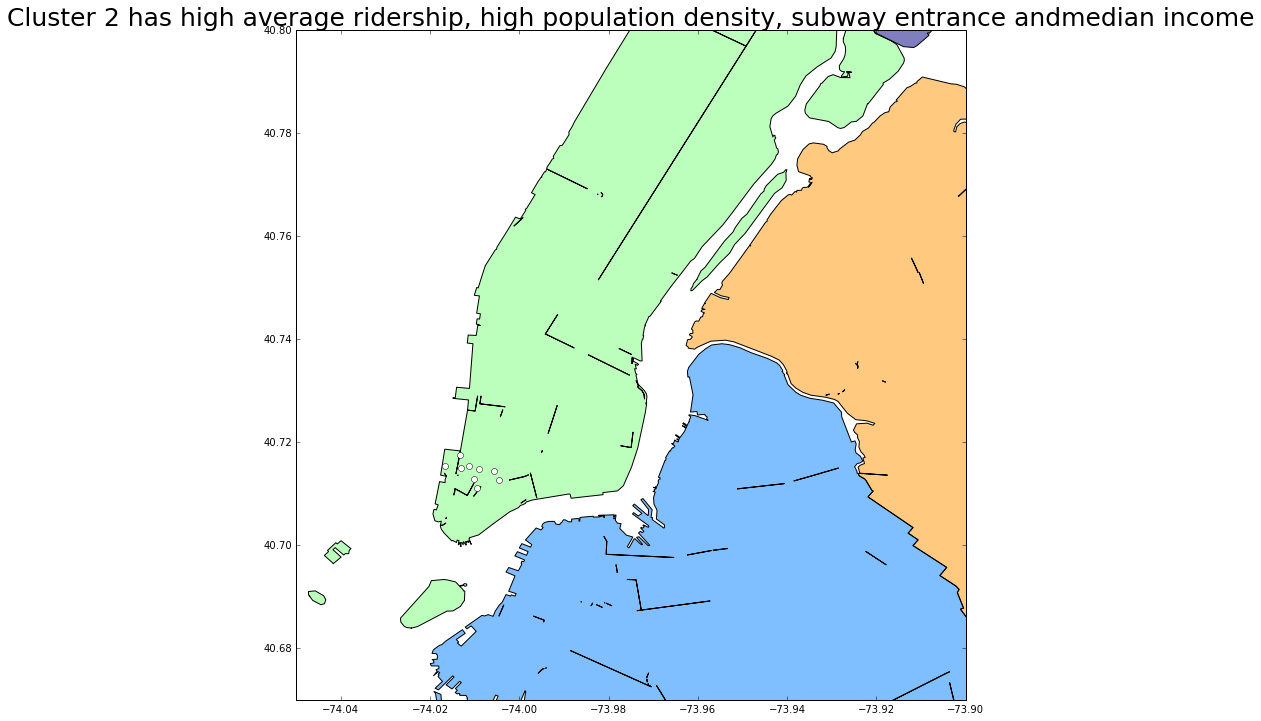

In [200]:
#Plot for KMeans
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors[regressors.kmeans_clusters_with_ridership == 2].plot(column = 'kmeans_clusters_with_ridership'\
                            , ax = ax, marker='o', cmap='hot_r', markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)
ax.set_title('Cluster 2 has high average ridership, high population density, subway entrance and\
median income',fontsize=25)

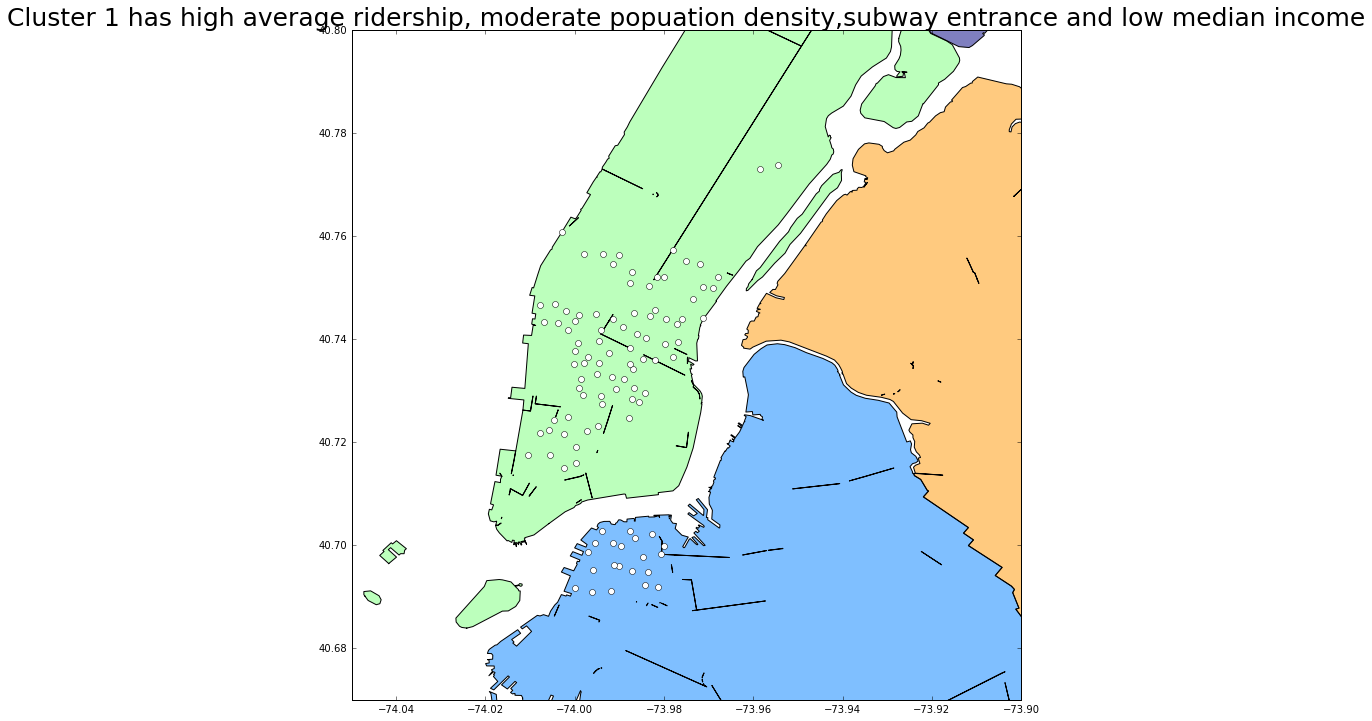

In [201]:
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors[regressors.kmeans_clusters_with_ridership == 1].plot(column = 'kmeans_clusters_with_ridership'\
                            , ax = ax, marker='o', cmap='hot_r', markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)
ax.set_title('Cluster 1 has high average ridership, moderate popuation density,\
subway entrance and low median income', fontsize=25)

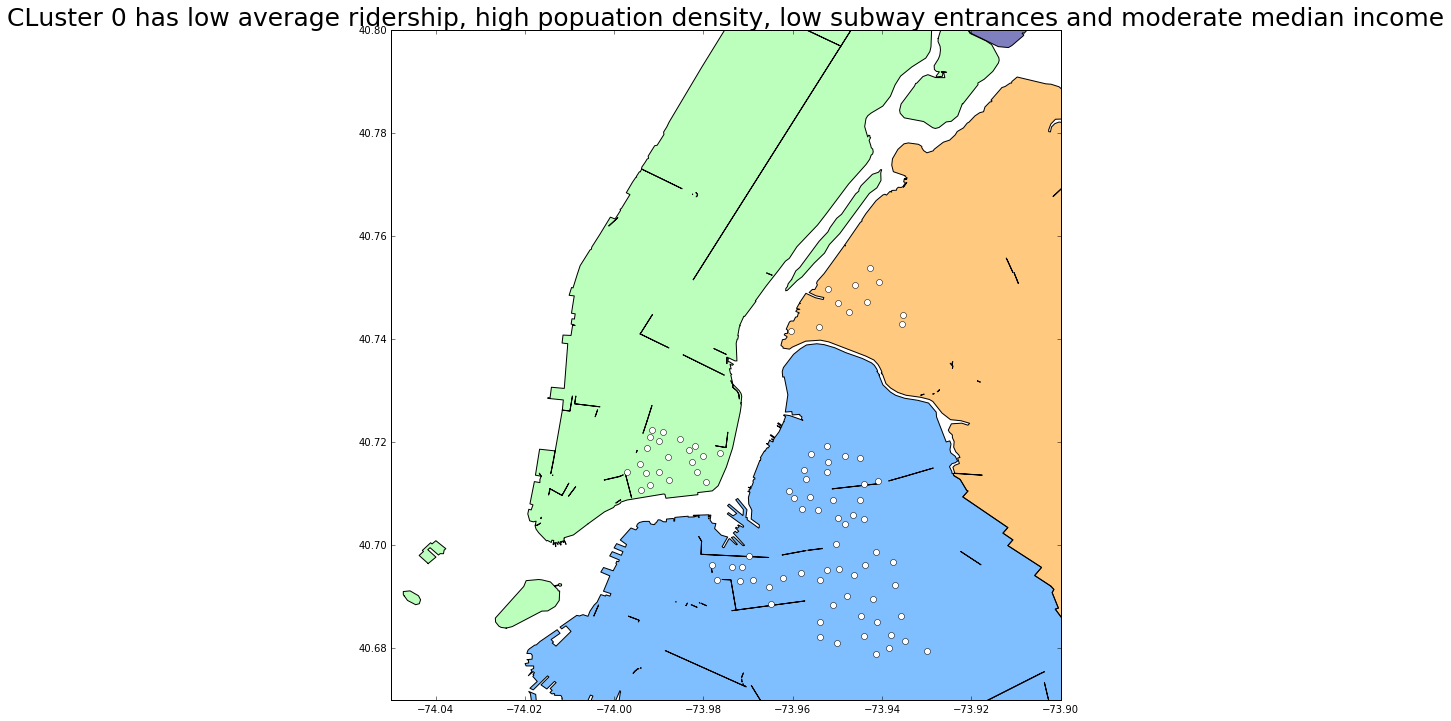

In [202]:
f, ax = plt.subplots(figsize=(12,12))
nyc.plot(ax = ax)
regressors[regressors.kmeans_clusters_with_ridership == 0].plot(column = 'kmeans_clusters_with_ridership'\
                            , ax = ax, marker='o', cmap='hot_r', markersize=6)
ax.set_ylim(40.67, 40.80)
ax.set_xlim(-74.05, -73.9)
ax.set_title('CLuster 0 has low average ridership, high popuation density, low subway entrances and moderate median income', fontsize=25)